In [1]:
# Importing the libraries

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [5]:
digits = load_digits()
print ("Image Data Shape", digits.data.shape)
print ("Label Data Shape", digits.target.shape)


Image Data Shape (1797, 64)
Label Data Shape (1797,)


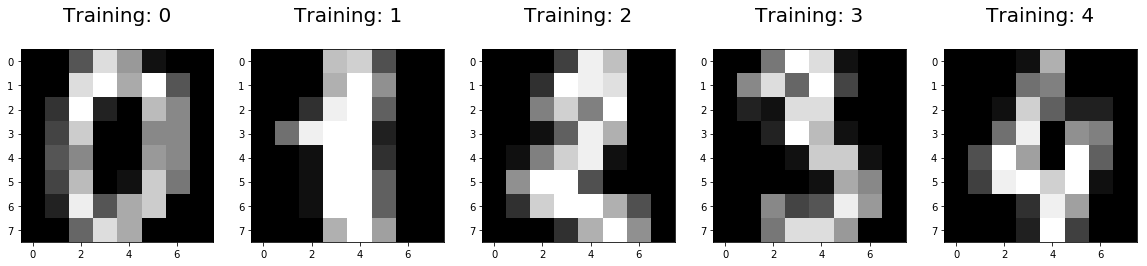

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)
    

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [8]:
print (x_train.shape)

(1383, 64)


In [9]:
print (y_train.shape)

(1383,)


In [12]:
print (x_test.shape)


(414, 64)


In [13]:
print (y_test.shape)

(414,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
prediction = logisticRegr.predict(x_test)
prediction

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 1, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       8, 8, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 8, 8, 8, 9, 8, 5, 1, 4, 8,
       7, 5, 8, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 7, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 8, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 8, 2, 0, 8, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 3, 1, 3, 5, 2, 8, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 7, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 3, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [20]:
score = logisticRegr.score(x_test, y_test)
score

0.9420289855072463

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  3,  2,  0],
       [ 0,  2,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 28]])

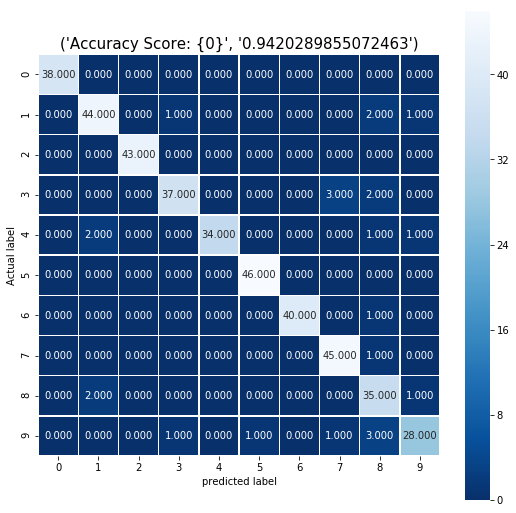

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('predicted label');
all_sample_title = 'Accuracy Score: {0}', format(score)
plt.title(all_sample_title, size = 15);